In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Online Retail.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format="%d-%m-%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.duplicated().sum()

5225

In [8]:
df = df.drop_duplicates()

In [9]:
print(df.duplicated().sum())

print(df.shape)

0
(401604, 8)


In [10]:
#**number of unique products
df["Description"].nunique()


3896

In [11]:
#product count
df["Description"].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64

In [12]:
#product is the most ordered
most=df.groupby("Description").agg({"Quantity":"sum"})
most.sort_values("Quantity", ascending = False).head(1000)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
...,...
WRAP MONSTER FUN,1250
GLAMOROUS MUG,1249
SET OF 2 CERAMIC PAINTED HEARTS,1247


In [13]:
#no of invoices 
df["InvoiceNo"].nunique()

22190

In [14]:
#money has been earned per invoice
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [15]:
df.groupby("InvoiceNo").agg({"TotalPrice":"sum"}).head()

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [16]:
#orders from differnt country 
df["Country"].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [25]:
type(df)

pandas.core.frame.DataFrame

In [17]:
#most expensive product
df.sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
222681,C556445,M,Manual,-1,10-06-2011 15:31,38970.00,15098.0,United Kingdom,-38970.00
173382,551697,POST,POSTAGE,1,03-05-2011 13:46,8142.75,16029.0,United Kingdom,8142.75
173277,C551685,POST,POSTAGE,-1,03-05-2011 12:51,8142.75,16029.0,United Kingdom,-8142.75
173391,C551699,M,Manual,-1,03-05-2011 14:12,6930.00,16029.0,United Kingdom,-6930.00
268027,C560372,M,Manual,-1,18-07-2011 12:26,4287.63,17448.0,United Kingdom,-4287.63


In [18]:
# country wise amont
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False)

,TotalPrice
Country,
United Kingdom,6747156.154
Netherlands,284661.540
EIRE,250001.780
Germany,221509.470
France,196626.050
Australia,137009.770
Switzerland,55739.400
Spain,54756.030
Belgium,40910.960


In [28]:
last_date = df.InvoiceDate.max()
last_date

Timestamp('2011-12-09 12:50:00')

In [29]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda values: (last_date - values.max()).days,
    "InvoiceNo" : lambda values: len(values),
    "TotalPrice": lambda values: np.sum(values)
})

rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [30]:
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [31]:
quantiles = np.arange(1, 6) * 20
quantiles

array([ 20,  40,  60,  80, 100])

In [32]:
rfm["r_score"] = np.digitize(rfm.recency, bins = np.percentile(rfm.recency, quantiles)
                           , right=True)

rfm["m_score"] = np.digitize(rfm.monetary, bins = np.percentile(rfm.monetary, quantiles)
                           , right=True)

rfm["f_score"] = np.digitize(rfm.frequency, bins = np.percentile(rfm.frequency, quantiles)
                           , right=True)

rfm["r_score"] = 4 - rfm["r_score"]

rfm["r_score"] = rfm["r_score"] + 1
rfm["f_score"] = rfm["f_score"] + 1
rfm["m_score"] = rfm["m_score"] + 1
rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
12346.0,325,2,0.00,1,1,1
12347.0,1,182,4310.00,5,5,5
12348.0,74,31,1797.24,2,4,3
12349.0,18,73,1757.55,4,4,4
12350.0,309,17,334.40,1,2,2


In [33]:
rfm.sample(10, random_state=123)

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
18142.0,150,18,1014.90,2,4,2
15326.0,333,29,311.71,1,2,2
13466.0,99,18,297.95,2,2,2
12953.0,9,17,329.85,5,2,2
13072.0,266,7,177.15,1,1,1
16751.0,30,25,1764.72,4,4,2
17472.0,190,174,697.54,1,3,5
15919.0,19,122,525.69,4,3,4
16794.0,0,280,1175.30,5,4,5


In [34]:
rfm["RFM_SCORE"] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,2,0.00,1,1,1,111
12347.0,1,182,4310.00,5,5,5,555
12348.0,74,31,1797.24,2,4,3,234
12349.0,18,73,1757.55,4,4,4,444
12350.0,309,17,334.40,1,2,2,122


In [35]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [36]:
rfm['Segment'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,111,Hibernating
12347.0,1,182,4310.00,5,5,5,555,Champions
12348.0,74,31,1797.24,2,4,3,234,At Risk
12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
12350.0,309,17,334.40,1,2,2,122,Hibernating


In [37]:
rfm[rfm["Segment"] == "Need Attention"].head()

,recency,frequency,monetary,r_score,m_score,f_score,RFM_SCORE,Segment
CustomerID,,,,,,,,
12413.0,66,40,6.941500e+02,3,3,3,333,Need Attention
12446.0,57,58,1.002310e+03,3,4,3,334,Need Attention
12454.0,52,30,-5.684342e-14,3,1,3,331,Need Attention
12458.0,70,38,9.474000e+02,3,4,3,334,Need Attention
12475.0,53,36,7.233800e+02,3,3,3,333,Need Attention


In [38]:
from sklearn import preprocessing, metrics, cluster
scaler = preprocessing.StandardScaler()
X = rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))

C:\Users\NAVEENKUMAR K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NAVEENKUMAR K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NAVEENKUMAR K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NAVEENKUMAR K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

Text(0, 0.5, 'Inertia Score')

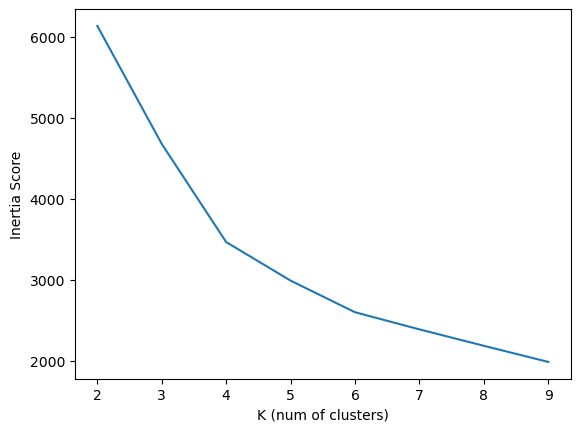

In [39]:
inertias = {}
for k in range(2, 10): 
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")

In [40]:
k = 4
kmeans = cluster.KMeans(n_clusters=k, random_state = 1)
rfm["cluster"] = kmeans.fit_predict(X)

C:\Users\NAVEENKUMAR K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
rfm.cluster.value_counts()

cluster
3    1319
1    1246
0     914
2     893
Name: count, dtype: int64

In [42]:
rfm["distance"] = 0.0
for i in range(k):
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    cluster_points = X[rfm.cluster == i]
    rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
rfm.sample(20)

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_20544\1058831519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_20544\1058831519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_20544\1058831519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,recency,frequency,monetary,r_score,m_score,f_score,RFM_SCORE,Segment,cluster,distance
CustomerID,,,,,,,,,,
12498.0,20,23,403.70,4,2,2,422,Potential Loyalists,2,0.153006
17190.0,58,20,249.74,3,2,2,322,About to Sleep,2,0.688511
15372.0,136,27,2007.40,2,5,2,225,Hibernating,0,1.464182
15428.0,14,6,93.78,4,1,1,411,Promising,2,1.144137
16188.0,44,67,981.86,3,4,4,344,Loyal Customers,0,0.721295
18230.0,8,89,2716.60,5,5,4,545,Champions,3,0.679188
17973.0,51,15,337.04,3,2,2,322,About to Sleep,2,0.688511
16366.0,18,18,327.30,4,2,2,422,Potential Loyalists,2,0.153006
15606.0,56,91,2422.64,3,5,4,345,Loyal Customers,3,1.094421


<Axes: xlabel='cluster', ylabel='recency'>

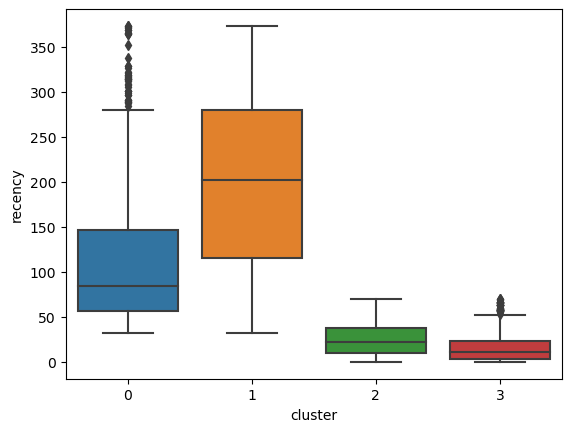

In [43]:
sns.boxplot(x='cluster', y='recency', data=rfm)

<Axes: xlabel='cluster', ylabel='frequency'>

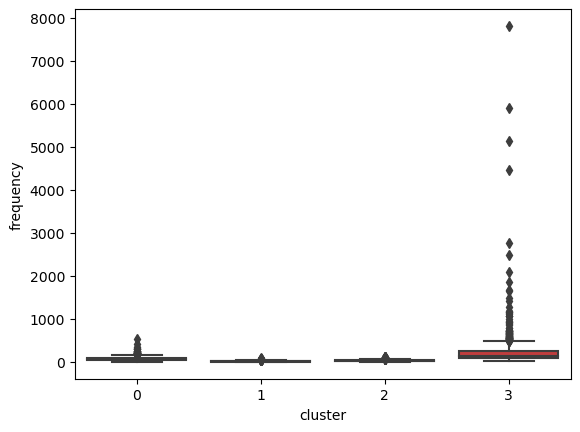

In [44]:
sns.boxplot(x='cluster', y='frequency', data=rfm)

<Axes: xlabel='cluster', ylabel='monetary'>

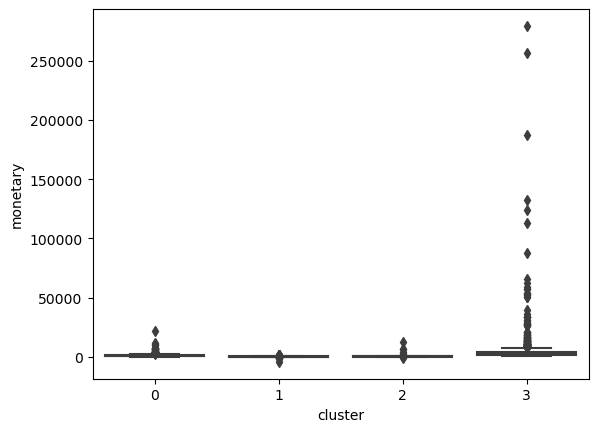

In [45]:
sns.boxplot(x='cluster', y='monetary', data=rfm)

In [46]:
rfm.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.877013,914
1,0.791976,1246
2,0.953922,893
3,0.773630,1319
